In [1]:
from IPython.display import display, Image

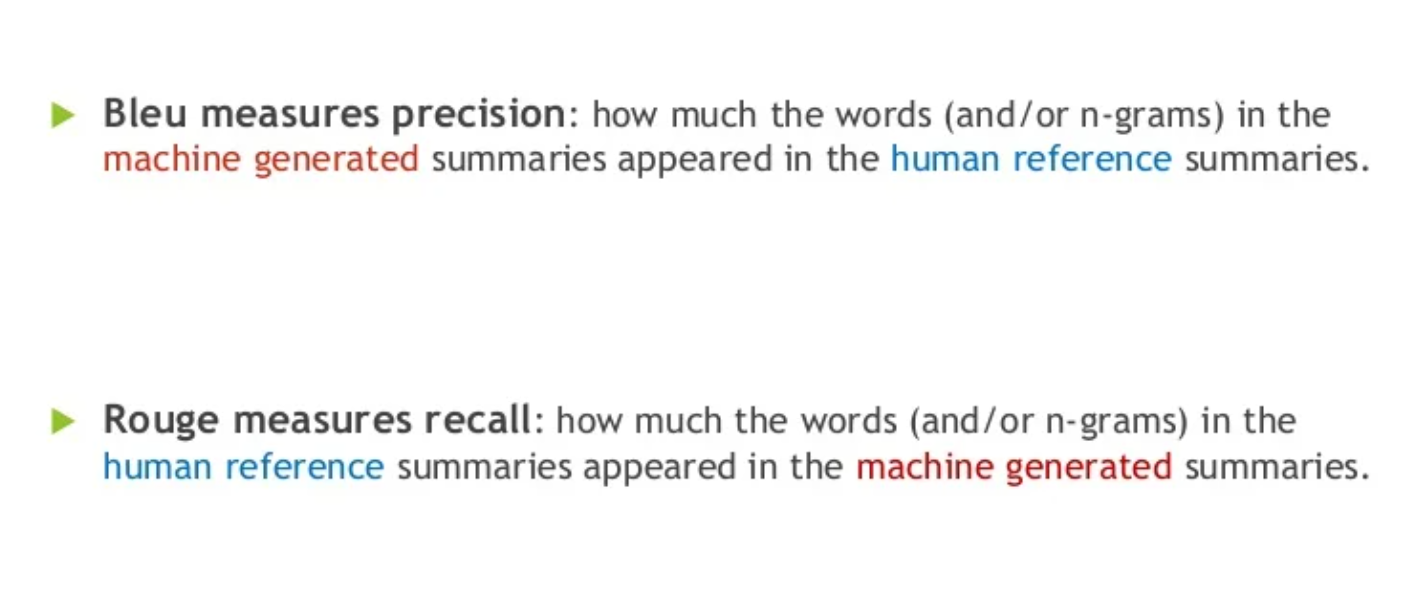

In [22]:
display(Image(filename='1.png'))

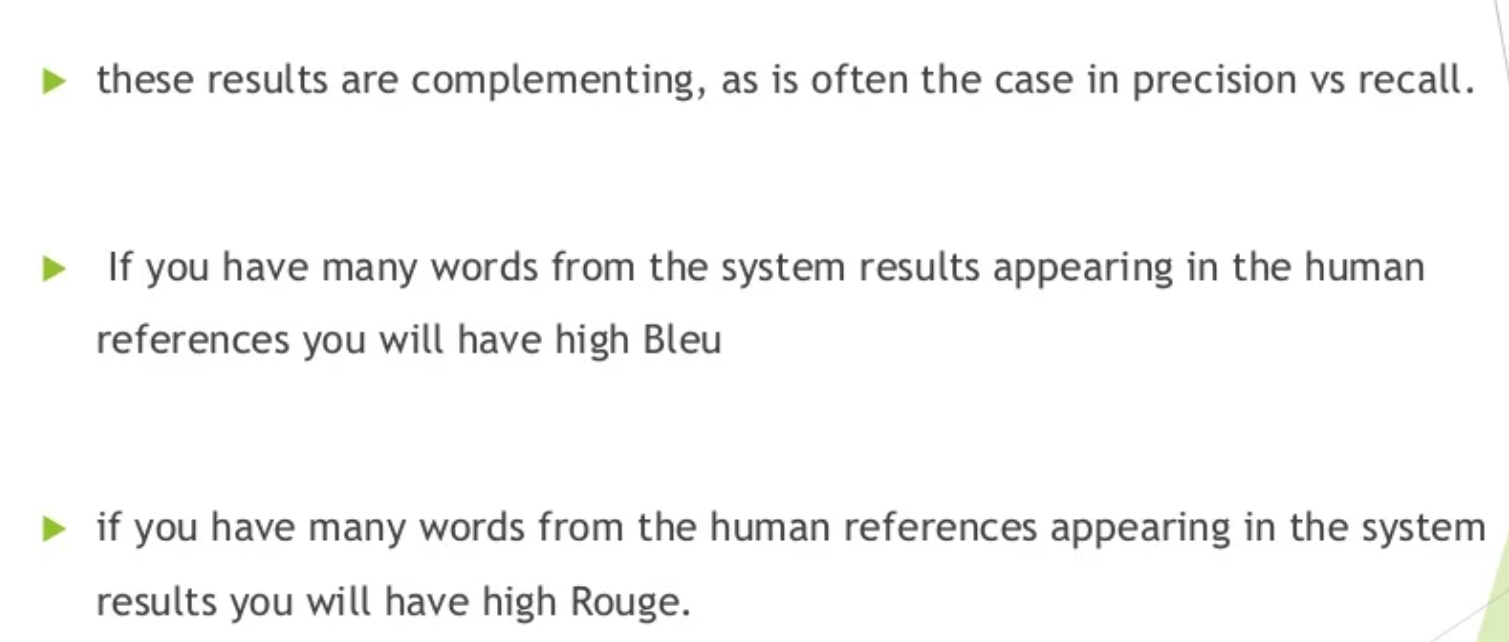

In [23]:
display(Image(filename='2.png'))

BLEU: The brevity penalty penalizes generated translations that are too short compared to the closest reference length with an exponential decay. The brevity penalty compensates for the fact that the BLEU score has no recall term.

Pros and Cons of ROUGE
This is the tradeoff to take into account when using ROUGE.
Pros: it correlates positively with human evaluation, it’s inexpensive to compute and language-independent.
Cons: ROUGE does not manage different words that have the same meaning, as it measures syntactical matches rather than semantics.

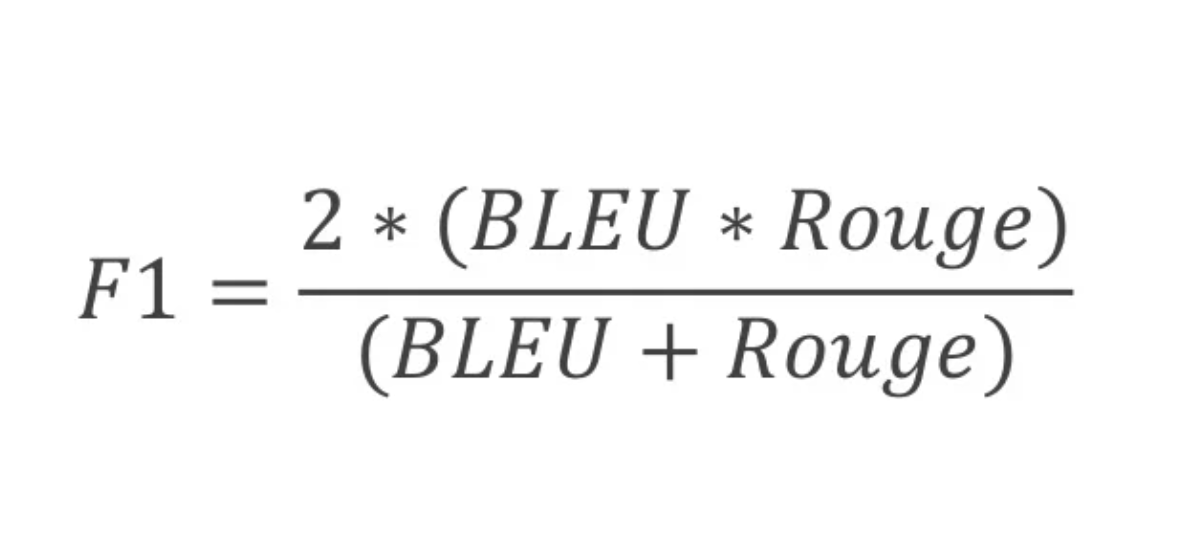

In [24]:
display(Image(filename='3.png'))

Additional References
https://rare-technologies.com/text-summarization-in-python-extractive-vs-abstractive-techniques-revisited/

https://medium.com/nlplanet/two-minutes-nlp-learn-the-rouge-metric-by-examples-f179cc285499

https://medium.com/nlplanet/two-minutes-nlp-learn-the-bleu-metric-by-examples-df015ca73a86

$$Rouge$$

In [ ]:
pip install rouge-score

ROUGE-N — measures unigram, bigram, trigram and higher order n-gram overlap
For example, ROUGE-1 refers to overlap of unigrams between the system summary and reference summary. ROUGE-2 refers to the overlap of bigrams between the system and reference summaries.

ROUGE-L — measures longest matching sequence of words using LCS. An advantage of using LCS is that it does not require consecutive matches but in-sequence matches that reflect sentence level word order. Since it automatically includes longest in-sequence common n-grams, you don’t need a predefined n-gram length.

ROUGE-S — Is any pair of words in a sentence in order, allowing for arbitrary gaps. This can also be called skip-gram concurrence. For example, skip-bigram measures the overlap of word pairs that can have a maximum of two gaps in between words. As an example, for the phrase “cat in the hat” the skip-bigrams would be “cat in, cat the, cat hat, in the, in hat, the hat”.

In [2]:
from rouge_score import rouge_scorer

In [8]:
#set the rougescorer metric first and compare each generated title and summary. (reference, candidate)
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')
print(scores)

{'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}


$$Bleu$$

In [3]:
from nltk.translate.bleu_score import sentence_bleu

In [14]:
#for each generated title and dataset summary, make a loop to split the two and run through sentence_bleu
reference = ['the quick brown fox jumped over the lazy dog'.split()]
candidate = 'the fast brown fox jumped over the lazy dog'.split()
print('BLEU score -> {}'.format(sentence_bleu(reference, candidate )))

candidate = 'The quick brown dog jumps on the log'.split()
print('BLEU score -> {}'.format(sentence_bleu(reference, candidate)))

BLEU score -> 0.7506238537503395
BLEU score -> 6.805395922591311e-155


$$More Examples$$

In [61]:
reference =['We meet on Monday to discuss the next step for our project'.split()]
candidate = 'On Monday, we will have a discussion about the next step of our project'.split()
print('BLEU score -> {}'.format(sentence_bleu(reference, candidate )))

BLEU score -> 3.515974884267917e-78


In [32]:
reference ='We meet on Monday to discuss the next step for our project'
candidate = 'On Monday, we will have a discussion about the next step of our project'
#candidate = 'On Monday, we will discuss'
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
scores = scorer.score(reference, candidate)
print(scores)

{'rougeL': Score(precision=0.5714285714285714, recall=0.6666666666666666, fmeasure=0.6153846153846153)}


$$Function$$

In [63]:
reference = ['the quick brown fox jumped over the lazy dog', 'We meet on Monday to discuss the next step for our project']
candidate = ['the fast brown fox jumped over the lazy dog', 'On Monday, we will have a discussion about the next step of our project']

In [32]:
def f_rscore(reference, candidate): #assuming both are lists, Rouge
    rscores = []
    rscorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    for i in range(len(reference)):
        rscore = rscorer.score(reference[i], candidate[i])
        rscores.append(list(rscore.values())[0][2]) # fscore
    return rscores

In [66]:
def f_bscore(reference, candidate): #assuming both are lists, BLEU
    bscores = []
    for i in range(len(reference)):
        bscore = sentence_bleu([reference[i].split()], candidate[i].split())
        bscores.append(bscore) # fscore
    return bscores

In [68]:
f_rscore(reference, candidate)

[0.8888888888888888, 0.6153846153846153]

In [67]:
f_bscore(reference, candidate)

[0.7506238537503395, 3.515974884267917e-78]